### квантовый генератор случайных чисел, влияние измерительного прибора



In [15]:
# импорт библиотек
from qiskit import *
from qiskit.visualization import *
from numpy import *
from numpy.linalg import *
from qiskit.providers.aer import Aer

In [16]:
# квантовая цепь из 1 кубита
qc = QuantumCircuit(1)

In [17]:
# проинициализируем кубит в состоянии "квантовый генератор случайных чисел"
# initial_state = [1/sqrt(2), 1/sqrt(2)]
# qc.initialize(initial_state, 0)

In [18]:
# проинициализируем кубит, пронормируем его
initial_state = [34 + 14 * 1j, 65-21*1j] # вектор состояния
initial_state = initial_state/norm(initial_state) # нормирование
qc.initialize(initial_state, 0)

In [19]:
# измерительный прибор
qc.measure_all()

In [20]:
# начальный вектор состояний
qc.save_statevector()

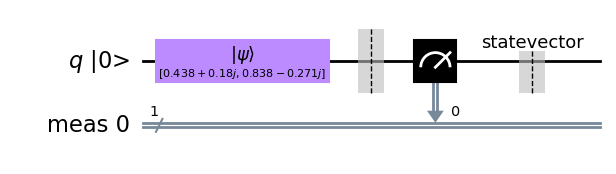

In [21]:
# графическое отображение квантовой цепи
qc.draw(output='mpl', initial_state=True)

In [22]:
# используем симулятор
sim = Aer.get_backend('aer_simulator')

# запуск симулятора
result = sim.run(qc).result()

In [23]:
counts = result.get_counts() # число измеренных нулей и единиц 
state = result.get_statevector() # сохраненный вектор

In [24]:
print(counts)

{'1': 792, '0': 232}


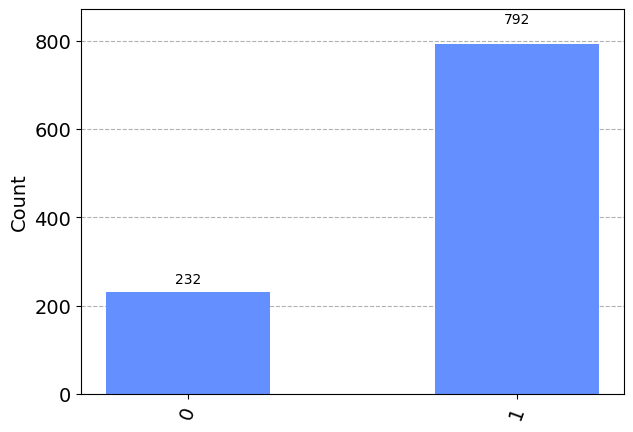

In [25]:
# гистограмма распределения 0 и 1
plot_histogram(counts)

по умолчанию
- первая амплитуда вероятности с0 = 1.+0.j
- вторая амплитуда вероятности с0 = 0.+0.j

In [26]:
print(state) # исходный вектор состояния

Statevector([0.        +0.j        , 0.95157054-0.30743048j],
            dims=(2,))


In [27]:
print(norm(state)) # норма вектора

1.0


In [28]:
print(abs(state[0])**2)
print(abs(state[1])**2)

0.0
1.0
